In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
minst = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = minst.load_data()

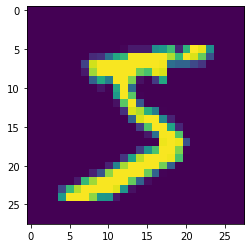

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
x_shape = x_train[0].shape

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = x_shape),
                                    tf.keras.layers.Dense(80, activation = "relu"),
                                    tf.keras.layers.Dense(60, activation = "relu"),
                                    tf.keras.layers.Dropout(rate = 0.3),
                                    tf.keras.layers.Dense(10, activation = "softmax")

])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])


In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 5, batch_size=34)

Epoch 1/5
1765/1765 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.9115 - val_loss: 0.2818 - val_accuracy: 0.9440
Epoch 2/5
1765/1765 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9233 - val_loss: 0.2104 - val_accuracy: 0.9474
Epoch 3/5
1765/1765 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9295 - val_loss: 0.2198 - val_accuracy: 0.9465
Epoch 4/5
1765/1765 [==============================] - 4s 2ms/step - loss: 0.2247 - accuracy: 0.9377 - val_loss: 0.1983 - val_accuracy: 0.9523
Epoch 5/5
1765/1765 [==============================] - 4s 2ms/step - loss: 0.2161 - accuracy: 0.9396 - val_loss: 0.2121 - val_accuracy: 0.9578


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2121 - accuracy: 0.9578


[0.21207639575004578, 0.9577999711036682]

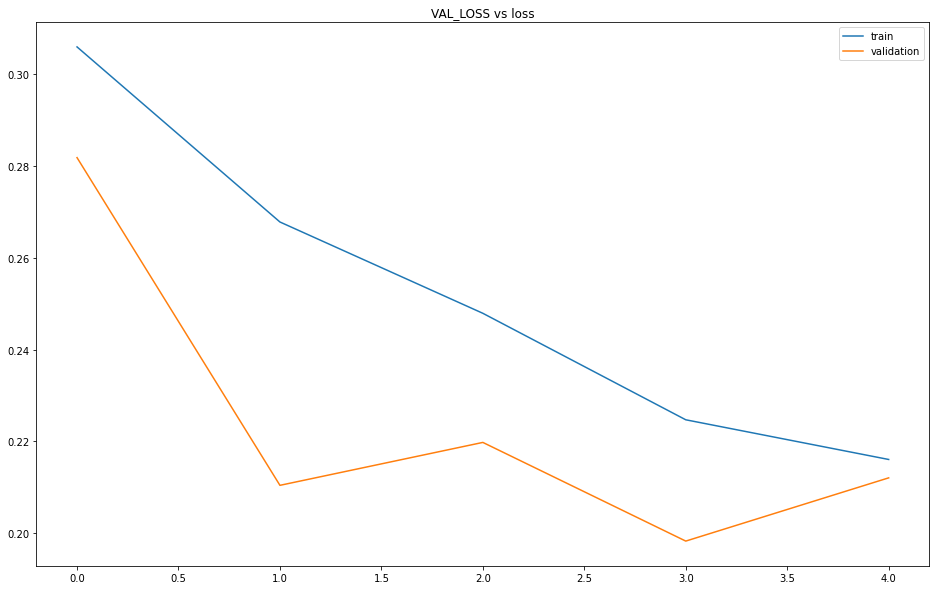

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(history.history['loss'],label = "train")
plt.plot(history.history["val_loss"], label = "validation")
plt.title("VAL_LOSS vs loss")
plt.legend()
plt.show()

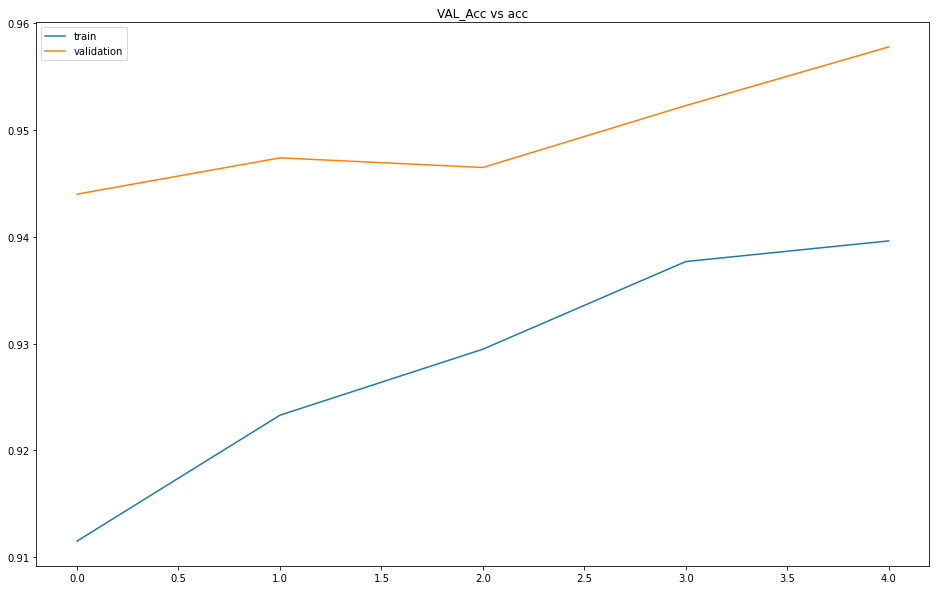

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(history.history['accuracy'],label = "train")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.title("VAL_Acc vs acc")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[6].tolist().index(max(y_pred[6]))

4

In [ ]:
y_pred[6].tolist()

[9.884683772584368e-29,
 4.6542501529504765e-24,
 4.605874528988859e-16,
 8.829620715664727e-24,
 0.9999970197677612,
 3.575722205459387e-22,
 6.663525080941631e-16,
 2.296526024903045e-10,
 4.081485039385841e-22,
 2.9756749881926225e-06]

In [ ]:
y_pred = [x.tolist().index(max(x)) for x in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm.tolist()

[[964, 0, 0, 2, 1, 0, 6, 1, 5, 1],
 [0, 1110, 3, 1, 0, 4, 1, 1, 15, 0],
 [9, 5, 968, 5, 8, 0, 2, 4, 31, 0],
 [1, 0, 6, 975, 0, 5, 0, 2, 18, 3],
 [0, 1, 4, 0, 955, 0, 6, 0, 6, 10],
 [5, 0, 0, 22, 1, 836, 12, 3, 9, 4],
 [4, 2, 2, 0, 3, 9, 935, 0, 3, 0],
 [2, 3, 8, 11, 6, 0, 0, 968, 8, 22],
 [4, 0, 3, 8, 5, 13, 5, 4, 924, 8],
 [5, 3, 0, 9, 15, 3, 0, 5, 26, 943]]

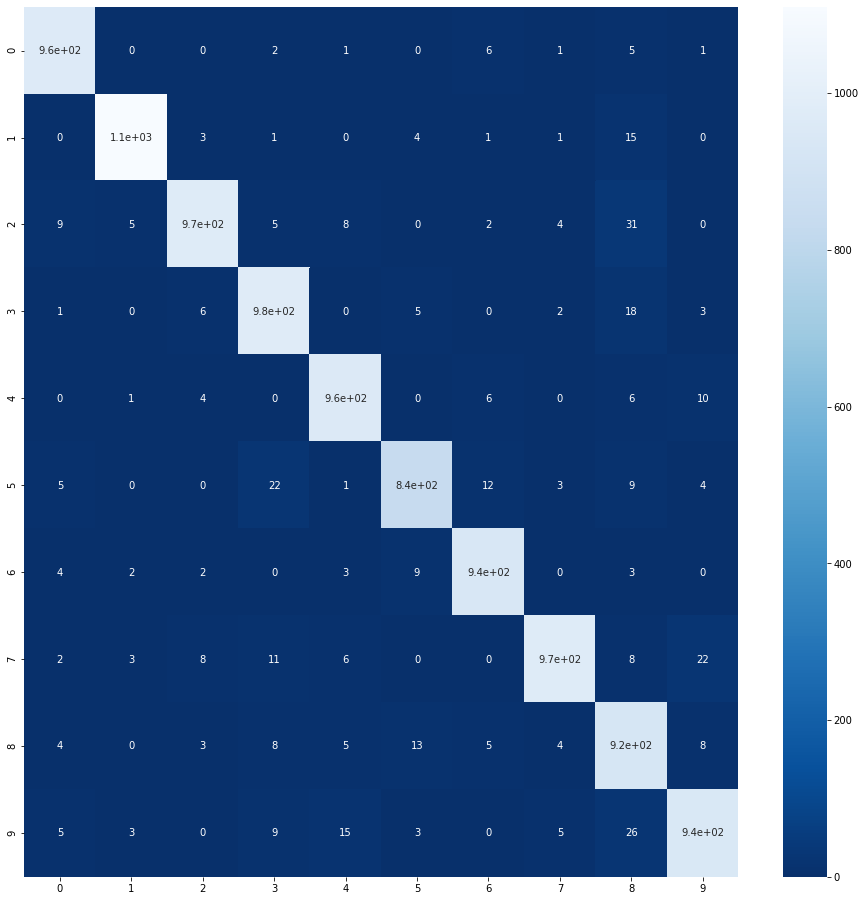

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,16))
sns.heatmap(cm.tolist(), annot = True, cmap = "Blues_r")
plt.show()

# manual convolution 

In [ ]:
import numpy as np
x_train_flat = x_train.flatten()

In [ ]:
input_img = x_train[0].flatten()

In [ ]:
len(input_img)

784

### EDGE detection kernal 


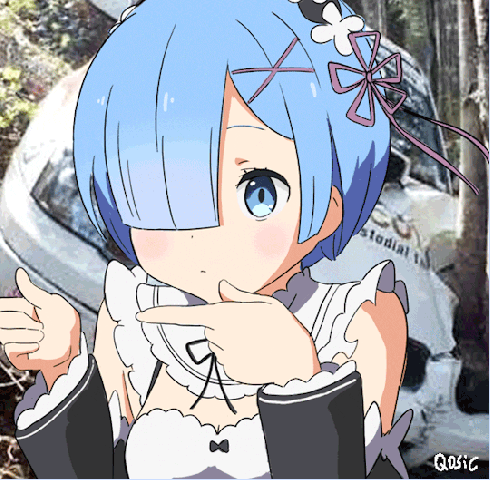

In [ ]:
kernel = np.array([[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]])

In [ ]:
kernal = kernel.flatten()

In [ ]:
output_img_height = x_train[0].shape[0]- kernel.shape[0] + 1
output_img_width = x_train[0].shape[1] - kernel.shape[1] + 1
output_flat = input_img.shape[0] - kernal.shape[0] + 1

In [ ]:
output_img = np.zeros(shape = (676,1))
for i in range(len(output_img)):
  for j in range(len(kernal)):
    output_img[i] += input_img[i]*kernal[j]

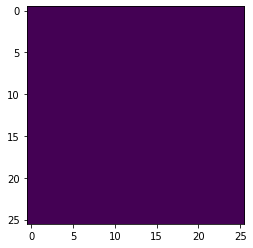

In [ ]:
plt.imshow(output_img.reshape((output_img_height,output_img_width)))

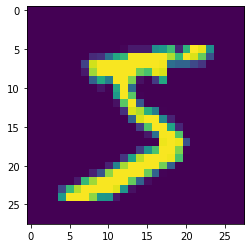

In [ ]:
plt.imshow(x_train[0])

In [ ]:
output_img

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],